## Algorithme de Deutsch-Josza

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
Cette algorithme est le premier algorithme qui a prouvé que l'informatique quantique pouvait battre l'informatique classique:  
#### Présentation de l'algorithme :  
  
Nous disposons d'une boîte noire quantique, connu sous le nom d'oracle qui implémente une fonction mathématique que l'on ne connait pas :  
>Un oracle est une boite noire à qui l'on donne une entrée et qui nous donne une sortie, en modélisant un comportement spécifique (Par exemple le comportement ci-dessous).
  
${\displaystyle f:\{0,1\}^{n}\rightarrow \{0,1\}}{\displaystyle f:\{0,1\}^{n}\rightarrow \{0,1\}}$. Nous savons que cette fonction est soit constante (la sortie est 0 ou 1 pour toutes les entrées) soit équilibrée (la sortie est 0 dans la moitié des cas, 1 dans les autres). Le but du problème est de savoir si la fonction est constante ou équilibrée à l'aide de l'oracle (On ne peut pas regarder la fonction).  
   
Dans un algorithme classique, pour vérifier si on a un résultat constant ou équilibrée dans le worst case scenario (WCS) on doit réaliser $2^{n-1}+1 $ opérations (Test en donnant une entrée à la focntion et en observant le résultat {0,1}). En effet si Tous les 0 et 1 sont triés ensemble et que pour chaque test on a la même sortie (que des 0 par exemple) alors il faudra vérifier la moitié des sorties + 1 pour être sûr que l'on a une fonction constante et pas une fonction équilibrée même si c'est de moins en moins probable au fur et à mesure du nombre de tests (Si la moitié des sorties possibles est 1, l'autre 0, lorsque que l'on teste presque la moitié des possibilités, peu de chances que l'on tombent à chaque fois sur un 0). En revanche si a un moment des tests on a 2 sorties différentes alors on est sûr que la fonction est équilibrée et on peut s'arrêter là. 

#### Version quantique

#### Sur la création de l'oracle:
**De la même manière que pour les précédents algorithmes, on aura un premier registre de qubits pour les entrées (ici tous les indices en binaire) et un deuxième registre utile pour implémenter l'oracle sur les autres qubits (En utilisant une proprité des circuits quantiques appelé le rebond de phase) mais qui restera inchangé.**

A l'inverse des algorithmes classiques, l'algorithme quantique est capable d'identifier à 100% la fonction mystère en une seule fois (comparer à $2^{n-1}+1$).

* On commence par initialiser un registre de n qubits dans l'état $\ket{0}$, ainsi qu'un deuxième registre avec un qbit à $\ket{1}$ qui nous servira a appliquer l'oracle (le qubit de sortie).
* On applique hadamard sur chaque qubit, ce qui nous permettra de tester toutes les possibilités à l'aide de la superposition quantique, et pour le qubit de sortie (deuxième registre) hadamard le met en superposition quantique or l'oracle que l'on va appliquer et composé de portes CNOT qui ont des propriétés particulières lorsque le qubit de sortie est en superposition comme le déphasage 
>Le désaphasage apparait lorsque l'on applique CNOT à des qubits en superposition quantique, il arrive que ce soit le bit de contrôle qui est modifié (Alors que c'est sensé être l'inverse).
* On applique l'oracle au circuit, il peut être une focntion constante ou équilibrée. 
* On réapplique Hadamard mais seulement sur le premier registre (celui de $\ket{0}^n $ ). Hadamard étant son inverse on essaie de rétablir l'état initial avant l'oracle et voir la différence. 
* On mesure ensuite le premier registre (celui des entrées) et on interprète les résultats pour trouver la forme de la fonction. Si la fonction est constante alors on est sensé mesurer que des zéros, en effet la fonction constante ne dépend pas des entrées (les entrées ne sont donc pas modifié). Si la fonction est balanced alors on mesurera des 1 due à leffet de déphasage créé sur les entrées par les Porte CNOT de l'oracle.


### Création des deux oracles

Dans l'oracle constant on veut juste que les sorties soient 1 ou 0, donc on initialise le bit de sortie (deuxième registre) à 0 ou 1 :

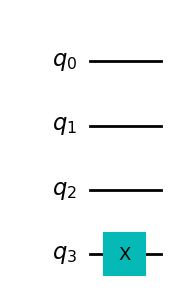

In [8]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

# set the length of the n-bit input string. 
n = 3

const_oracle = QuantumCircuit(n+1)

def create_const_oracle(qc):
    output = np.random.randint(2)
    if output == 1:
        qc.x(n)
    return qc 

display(create_const_oracle(const_oracle).draw('mpl'))


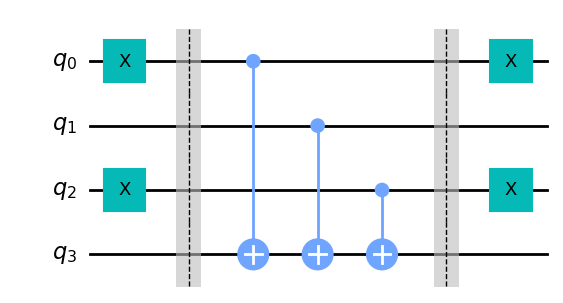

In [11]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

def create_balanced_oracle( qc,bit_string) :
    # Place X-gates
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            qc.x(qubit)

    # Use barrier as divider
    qc.barrier()

    # Controlled-NOT gates
    for qubit in range(n):
        qc.cx(qubit, n)

    qc.barrier()
    qc.draw()

    # Place X-gates
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            qc.x(qubit)
    return qc

qc =create_balanced_oracle( balanced_oracle,b_str)
display(qc.draw('mpl'))

### L'algorithme quantique:

Balanced est un boolean si égale à 1 l'oracle sera balanced sinon sera constant

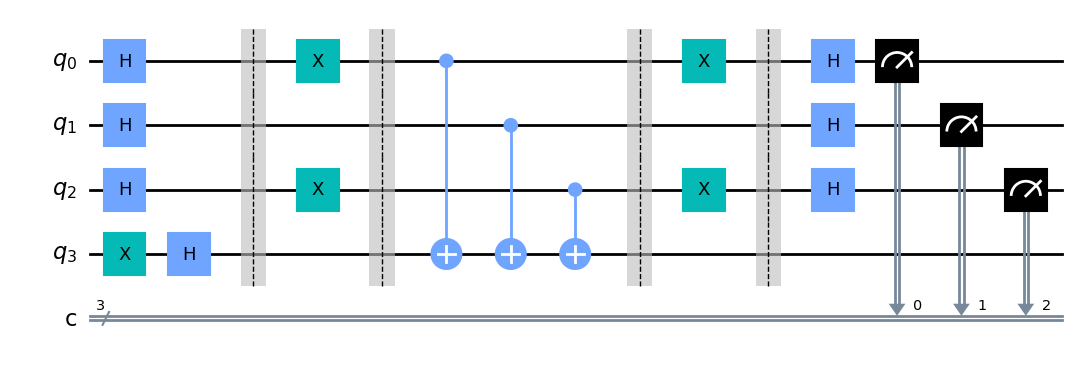

In [14]:
dj_circuit = QuantumCircuit(n+1, n)

def create_deutsch_circuit(qc,balanced = 0): # Balanced is a boolean, if true the oracle will be balanced
    # Apply H-gates
    for qubit in range(n):
        qc.h(qubit)

    # Put qubit in state |->
    qc.x(n)
    qc.h(n)

    # Add oracle
    qc.barrier()
    if balanced :
        create_balanced_oracle(qc,b_str)
    else:
        create_const_oracle(qc)
    qc.barrier()
    # Repeat H-gates
    for qubit in range(n):
        qc.h(qubit)
    # Measure
    for i in range(n):
        qc.measure(i, i)

    return qc

dj_circuit = create_deutsch_circuit(dj_circuit, 1)
display(dj_circuit.draw('mpl'))

#### Exemple avec balanced oracle
Comme on n'a 0% de chances de mesurer 000, l'oracle est donc bien balanced

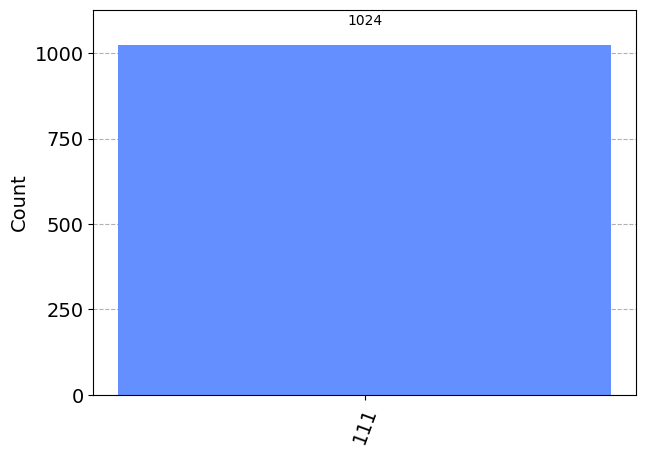

In [20]:
qc = QuantumCircuit(n+1, n)
qc = create_deutsch_circuit(qc, 1)
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

#### Exemple avec oracle constant
On voit qu'ici on n'a 100% de chances d'obtenir 000

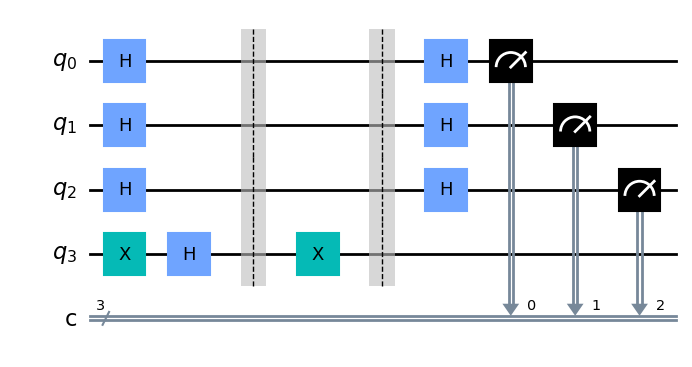

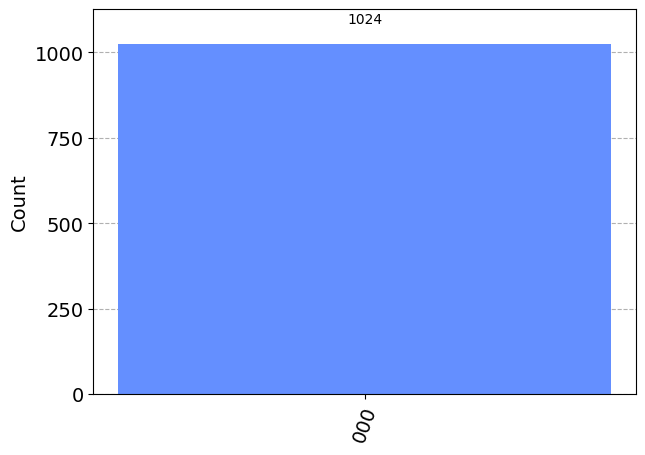

In [21]:
qc = QuantumCircuit(n+1, n)
qc = create_deutsch_circuit(qc)
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
display(qc.draw('mpl'))
display(plot_histogram(answer))

### Oracle général et test :

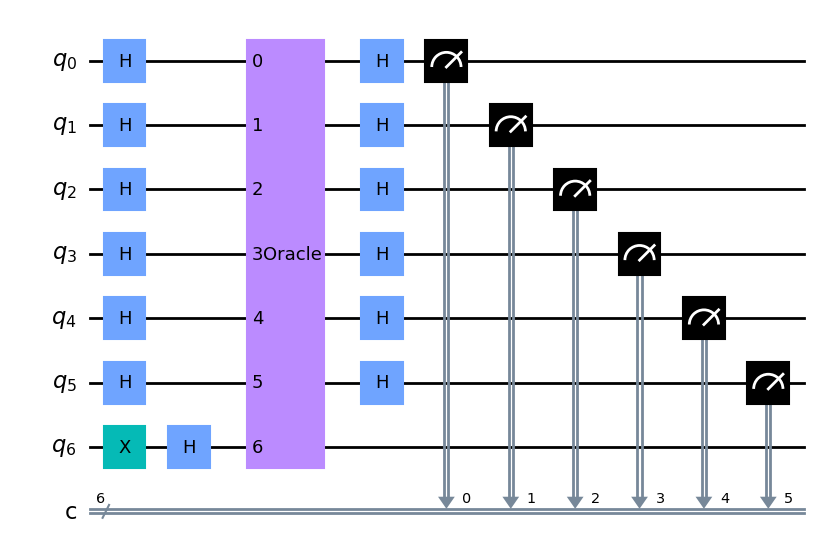

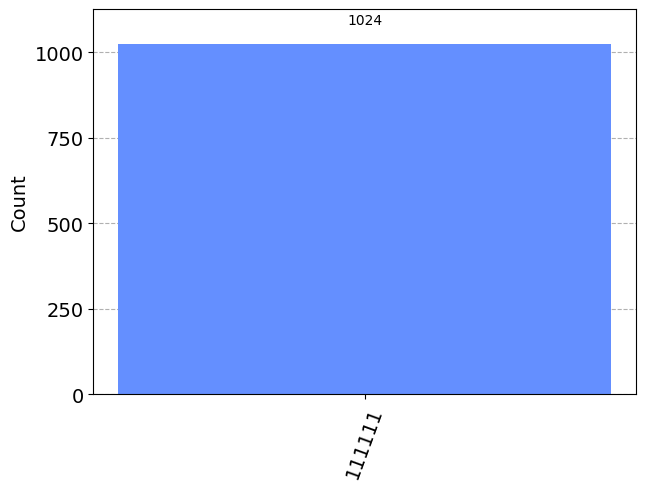

In [24]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

def create_deutsch_circuitV2(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

n = 6
oracle_gate = dj_oracle('balanced', n)
dj_circuit = create_deutsch_circuitV2(oracle_gate, n)
display(dj_circuit.draw('mpl'))
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
display(plot_histogram(answer))

### Exercice 2 : L'algorithme de Simon


>Rappel XOR : $0 \oplus 1 = 1  \quad 1 \oplus 0 = 1$  

>Application mathématique d'Hadamard sur $n$ qubits : $\frac{1}{\sqrt{2^n}} \sum_{x\in {0, 1}^n} \ket{x}  $  

##### Présentation du problème :

C'est le même principe que le deutsz josza problème, on a une fonction oracle qui peut avoir plusieurs comportements et on cherche a identifier rapidement la forme de la fonction.  
Le but est d'identifier la forme de l'oracle (One-to-one ou Two-to-one), un oracle One-to-one est une fonction qui va toujours renvoyer la valeur de l'entrée ($f(x_1)=f(x_2) \rightarrow x_1=x_2 $), et une fonction two-to-one relie 2 entrée différentes à une sortie.  

Le mapping two-to-one est défini par b, une bitstring caché, b est en binaire( distance entre x1 et x2 pour avoir la même sortie)  
b est obtenu comme ceci : $f(x_1)=f(x_2) \rightarrow x_1 \oplus x_2 = b  $  
b = 000 => oracle one-to-one  
b = 010 => oracle two-to-one (avec distance de 2 entre chaque sortie égale : $f(1) = f(3) =1 $)    


Avec un algorithme classique, dans le worst case scenario, on a que des zeros pour b au fur et à mesure des tests. Donc on a soit une fonction de type 1 : $f(x_1)=f(x_2) \quad \Rightarrow \quad x_1 = x_2\quad \Rightarrow\quad x_1 \oplus x_2 = 0 $    
Soit une fonction de type 2 avec B qui contient des 0 et des 1, mais on est malchanceux et on a que les cas où $x_1 = x_2 $ donc $b = 0$.   
Dans ce worst case scenario pour être sûr que l'on a une fonction de type 1 et pas une fonction de type 2 on doit tester $2^{n-1}+1$, soit la moité des cas possibles. Alors qu'avec un algorithme quantique, on a besoin que d'un appel de fonction pour avoir une réponse sûr à 100%.   
C'est l'algorithme de Simon.  

>n est le nombre de qubits  
>Totalité des combinaisons : $2^n$  
>Moitié des cas + 1 est : $\frac{2^n}{2} + 1 = 2^{n-1} +1 $    
   

#### Algorithme quantique :
* On initialise b qui nous donnera la fonction oracle  
* On commence par créer toutes les entrées que l'on donnera à l'oracle avec un registre de n qubits à 0, puis un autre registre qui contiendra aussi n qubits (tous à 0 aussi) qui servira pour définir l'oracle.
* On applique Hadamard sur tous les qubits du premier registre, pour mettre tous les qubits en superposition quantique ($\ket{+} $), pour tester toutes les possibilités (tous les états en même temps).
* On applique la fonction oracle qui implémente un oracle en fonction de b sur les deux registres.   
* Comme on connait déjà b on ne mesure pas le second registre.   
* On refait hadamard pour annuler le premier Hadamard (Par exemple si l'oracle est one-to-one, rien n'aura était modifié)
* On mesure le premier registre, puis on vérifie que le produit scalaire des résultats avec b sont bien égales à 0. 


C:\Users\kilap\AppData\Local\Temp\ipykernel_18916\1536078948.py:17: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  simon_circuit += simon_oracle(b)


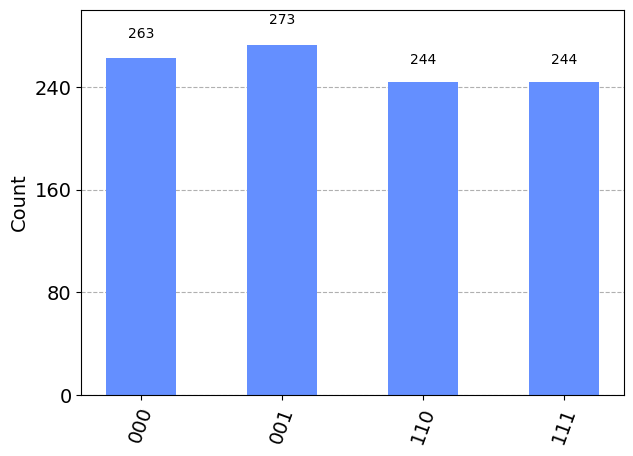

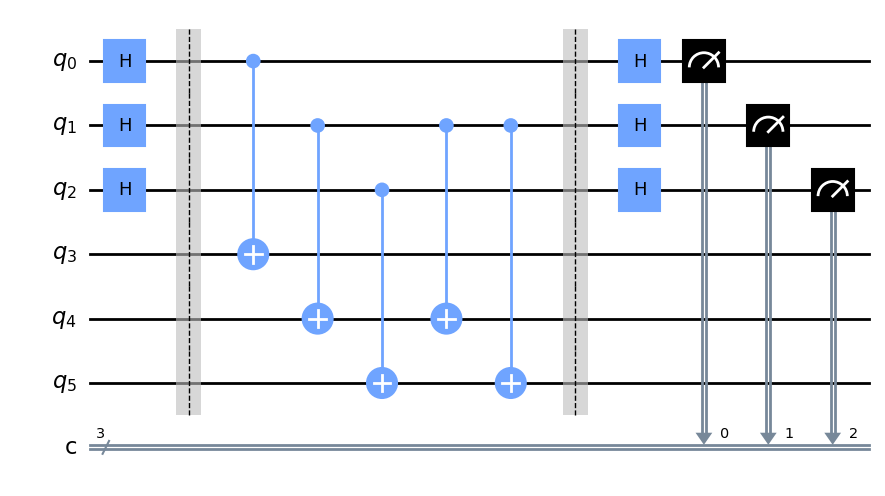

In [15]:
# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle
b = '110'
n = len(b)

def create_simon_circuit(n):
    simon_circuit = QuantumCircuit(n*2, n)
    # Apply Hadamard gates before querying the oracle
    simon_circuit.h(range(n))
    simon_circuit.barrier()
    simon_circuit += simon_oracle(b)
    simon_circuit.barrier()
#    simon_circuit.measure(range(n+1,2n), range(n+))
    # Apply Hadamard gates to the input register
    simon_circuit.h(range(n))
    # Measure qubits
    simon_circuit.measure(range(n), range(n))
    return simon_circuit

qc = create_simon_circuit(n)
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
display(plot_histogram(counts))


display(qc.draw('mpl'))

#### Vérification

Pour vérifier que les résultats sont les bons et comme on connait b il nous reste à vérifier que les produits scalaires de b avec les solutions sont égales à 0 (mod 2) :
$$b \cdot z = 0 (mod 2) \quad \quad Donc  \quad si \quad \quad b \cdot z = 2 (mod 2)= 0 $$

In [16]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)



print(counts)
for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )


{'110': 244, '111': 244, '001': 273, '000': 263}
110.110 = 0 (mod 2)
110.111 = 0 (mod 2)
110.001 = 0 (mod 2)
110.000 = 0 (mod 2)


##### Deuxième exemple avec fonction two-to-one:

C:\Users\kilap\AppData\Local\Temp\ipykernel_18916\1385583559.py:17: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  simon_circuit += simon_oracle(b)


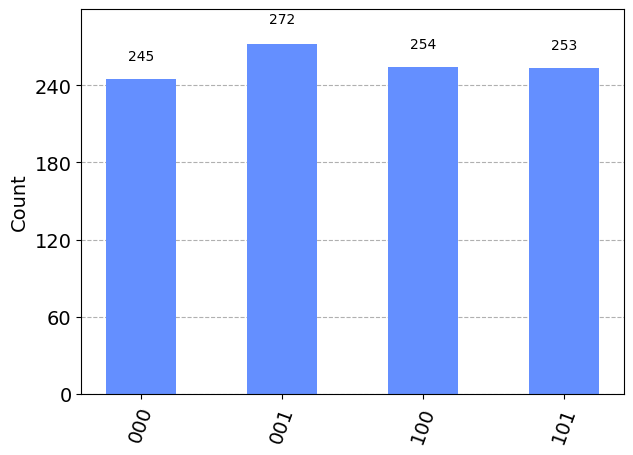

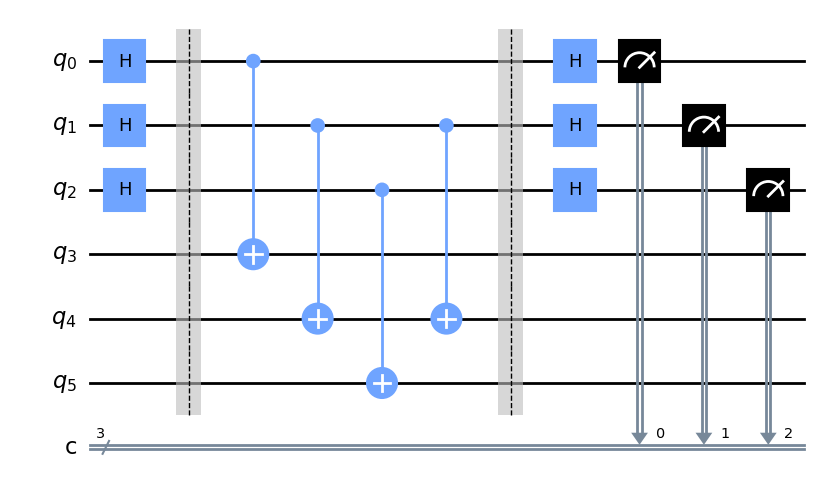

{'100': 254, '101': 253, '001': 272, '000': 245}
010.100 = 0 (mod 2)
010.101 = 0 (mod 2)
010.001 = 0 (mod 2)
010.000 = 0 (mod 2)


In [12]:
b='010' # in binary 010 = 2
n = len(b)

qc = create_simon_circuit(n)
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
display(plot_histogram(counts))

display(qc.draw('mpl'))
print(counts)
for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )


#### Exemple avec fonction one-to-one

Pour cet oracle rien n'est censé être modifié :

C:\Users\kilap\AppData\Local\Temp\ipykernel_18916\1536078948.py:17: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  simon_circuit += simon_oracle(b)


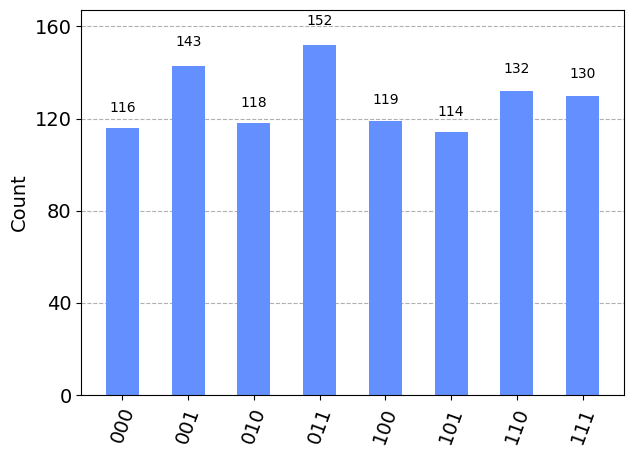

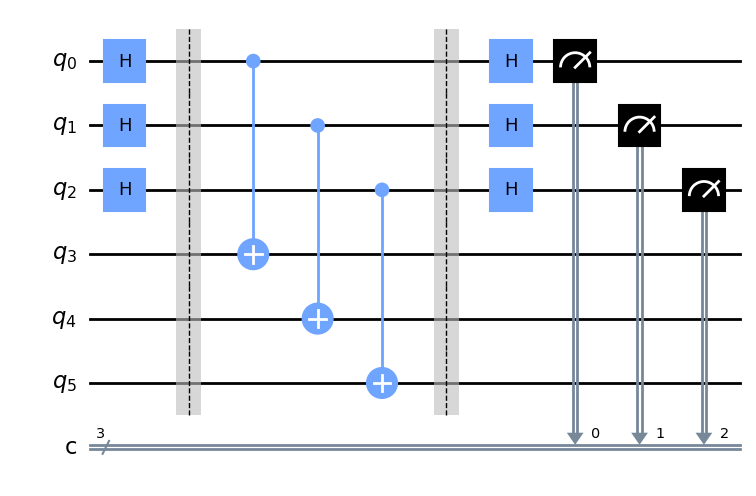

{'011': 152, '000': 116, '101': 114, '100': 119, '001': 143, '110': 132, '111': 130, '010': 118}
000.011 = 0 (mod 2)
000.000 = 0 (mod 2)
000.101 = 0 (mod 2)
000.100 = 0 (mod 2)
000.001 = 0 (mod 2)
000.110 = 0 (mod 2)
000.111 = 0 (mod 2)
000.010 = 0 (mod 2)


In [17]:
b='000' # in binary 010 = 2
n = len(b)

qc = create_simon_circuit(n)
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
display(plot_histogram(counts))

display(qc.draw('mpl'))
print(counts)
for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )
